In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px

In [3]:
## Import data here
grh = pd.read_csv("File paths")

In [4]:
grh_copy = grh.copy()

In [5]:
grh.head()

,round_number,round_start_date,round_end_date,grant_title,grant_id,region,category,url,match_amount,num_contributions,num_unique_contributors,crowdfund_amount_contributions_usd,total
0,12,2021-12-01,2021-12-16,Coin Center is educating policy makers about p...,1668,north_america,Community,https://gitcoin.co/grants/1668/coin-center-is-...,"$340,000.00",6914,5727,"$103,838.93","$443,838.93"
1,12,2021-12-01,2021-12-16,Electronic Frontier Foundation,3974,north_america,Community,https://gitcoin.co/grants/3974/electronic-fron...,"$228,273.84",3648,3331,"$58,715.04","$286,988.88"
2,12,2021-12-01,2021-12-16,The Tor Project,2805,undefined,Infra Tech,https://gitcoin.co/grants/2805/the-tor-project,"$188,294.80",3497,3069,"$95,279.64","$283,574.44"
3,12,2021-12-01,2021-12-16,Longevity Prize (by VitaDAO),4083,europe,Grants Round 12,https://gitcoin.co/grants/4083/longevity-prize...,"$176,195.45",920,857,"$7,815.29","$184,010.75"
4,12,2021-12-01,2021-12-16,Rotki - The portfolio tracker and accounting t...,149,europe,dApp Tech,https://gitcoin.co/grants/149/rotki-the-portfo...,"$129,131.34",4684,4311,"$25,373.62","$154,504.96"


In [6]:
grh["crowdfund_amount_contributions_usd"][0].split('$')[1].split(",")

['103', '838.93']

In [7]:
from re import sub
from decimal import Decimal

money = '$6,150,593.22'
value = Decimal(sub(r'[^\d.]', '', money))
value

Decimal('6150593.22')

In [8]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF8')
money = "$6,150,593.22"
locale.atof(money.strip("$"))

6150593.22

In [9]:
cac = [locale.atof(str(i).strip("$")) for i in grh["crowdfund_amount_contributions_usd"]]

In [10]:
grh_copy["crowdfund_amount_contributions_usd(int)"] = cac

In [11]:
total = [locale.atof(str(i).strip("$")) for i in grh["total"]]

In [12]:
grh_copy["total(int)"] = total

In [13]:
match_amount = [locale.atof(str(i).strip("$")) for i in grh["match_amount"]]
grh_copy["match_amount(int)"] = match_amount

**- Distribution of contributions by individual donors over geographic regions in the world.**

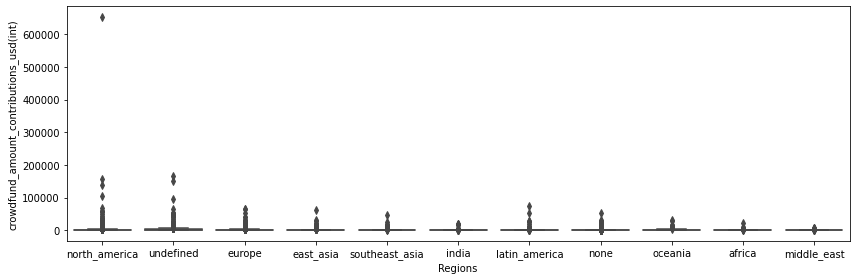

In [29]:
plt.figure(figsize=(12, 4))
sns.boxplot(x="region", y = "crowdfund_amount_contributions_usd(int)", data=grh_copy);
plt.xlabel("Regions")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True)
plt.tight_layout()

**- Distribution of contributions by individual donors over different type of grants**

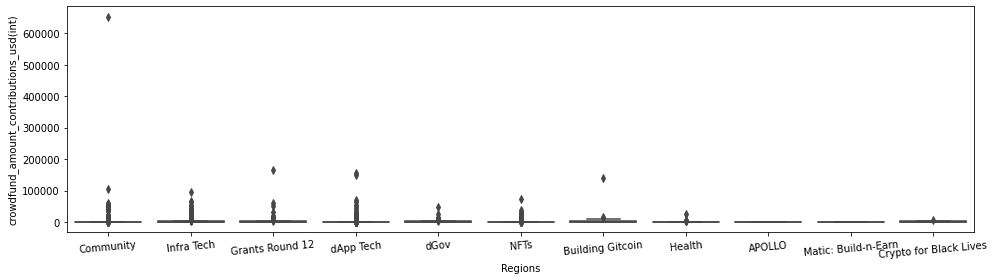

In [33]:
plt.figure(figsize=(14, 4))
sns.boxplot(x="category", y = "crowdfund_amount_contributions_usd(int)", data=grh_copy);
plt.xlabel("Regions")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    rotation=5)
plt.tight_layout()

In [35]:
grh_copy["crowdfund_amount_contributions_usd(int)"].quantile(0.99)

29011.04499999987

In [39]:
df1 = grh_copy.loc[grh_copy["crowdfund_amount_contributions_usd(int)"] > 29011.04499999987]
df2 = grh_copy.loc[grh_copy["crowdfund_amount_contributions_usd(int)"] < 29011.04499999987]

In [37]:
grh_copy.shape

(5906, 14)

In [154]:
grh_copy2 = grh_copy.dropna(axis=0)

In [155]:
px.box(data_frame=grh_copy2, x = "region", y = "crowdfund_amount_contributions_usd(int)",
       color="region",
       boxmode="overlay",
       title="Distribution of Crowdfund Amount Contributions USD over region.".title(),
       labels={"crowdfund_amount_contributions_usd(int)": "Crowdfund Amount Contributions USD",
                         "region": "Regions"})

In [152]:
px.box(data_frame=grh_copy, x = "category", y = "crowdfund_amount_contributions_usd(int)",
       color="category",
       boxmode="overlay",
       title="Distribution of Crowdfund Amount Contributions USD over category.".title(),
       labels={"crowdfund_amount_contributions_usd(int)": "Crowdfund Amount Contributions USD",
                         "region": "Regions"})

In [145]:
px.box(data_frame=df1, x = "region", y = "crowdfund_amount_contributions_usd(int)",
       color="region",
       boxmode="overlay",
       title="Distribution of Crowdfund Amount Contributions USD Greater than 99% Quantile over Regions.".title(),
       labels={"crowdfund_amount_contributions_usd(int)": "Crowdfund Amount Contributions USD",
                         "region": "Regions"})

In [149]:
px.box(data_frame=df1, x = "category", y = "crowdfund_amount_contributions_usd(int)",
       color="category",
       #boxmode="overlay",
       title="Distribution of Crowdfund Amount Contributions USD greater than 99 Quantile Over Category.".title(),
       labels={"crowdfund_amount_contributions_usd(int)": "Crowdfund Amount Contributions USD",
                         "category": "Categories"})

In [148]:
px.box(data_frame=df2_copy, x = "region", y = "crowdfund_amount_contributions_usd(int)",
       color="region",
       boxmode="overlay",
       title="Distribution of Crowdfund Amount Contributions USD less than 99% Quantile over Regions.".title(),
       labels={"crowdfund_amount_contributions_usd(int)": "Crowdfund Amount Contributions USD",
                         "region": "Regions"})

In [151]:
px.box(data_frame=df2, x = "category", y = "crowdfund_amount_contributions_usd(int)",
       color="category",
       #boxmode="overlay",
       title="Distribution of Crowdfund Amount Contributions USD less than 99% Quantile Over Category.".title(),
       labels={"crowdfund_amount_contributions_usd(int)": "Crowdfund Amount Contributions USD",
                         "category": "Categories"})

#### Trying some animations...

In [100]:
dff2 = df2.sort_values(by="round_number")

In [ ]:
df2_copy = df2.dropna(axis=0)

In [76]:
px.violin(data_frame=df2, x = "category", y = "crowdfund_amount_contributions_usd(int)",
       color="category",
        animation_frame="round_number",
        box=True,
       #boxmode="overlay",
       title="Distribution of Crowdfund Amount Contributions USD Less than 99 Quantile Over Category.",
       labels={"crowdfund_amount_contributions_usd(int)": "Crowdfund Amount Contributions USD",
                         "y": "Methods"})

In [106]:
px.violin(data_frame=df2_copy, x = "region", y = "crowdfund_amount_contributions_usd(int)",
          color="region",
          animation_frame="round_number",
          box=True,
          #boxmode="overlay",
          title="Distribution of Crowdfund Amount Contributions USD Less than 99 Quantile Over Category.",
          #labels={"crowdfund_amount_contributions_usd(int)": "Crowdfund Amount Contributions USD",
          #               "y": "Methods"}, 
          #width=1000
         height=500)

In [91]:
df2.shape

(4667, 14)

**- Average Crowdfund Amount Contributions USD for each round.**

In [137]:
avg_c["crowdfund_amount_contributions_usd(int)"].round(2)

0      525.43
1     1672.70
2     1534.11
3      698.09
4      326.61
5      453.16
6      958.42
7     5609.65
8     1707.34
9     1437.09
10    1609.79
11    3332.15
Name: crowdfund_amount_contributions_usd(int), dtype: float64

In [138]:
avg_c = pd.DataFrame(grh_copy.groupby("round_number").mean()["crowdfund_amount_contributions_usd(int)"])
avg_c.reset_index(inplace=True)
avg_c["crowdfund_amount_usd(int)"] = avg_c["crowdfund_amount_contributions_usd(int)"].round(2)

In [156]:
avg_c.to_csv("Average Crowdfund Amount Contributions USD for each round.csv", index=False)

In [140]:
barchart1 = px.bar(data_frame= avg_c,
                 x= "round_number",
                 y="crowdfund_amount_contributions_usd(int)",
                 color="crowdfund_amount_contributions_usd(int)",
                text="crowdfund_amount_usd(int)",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  #barmode="group",
                  title="Average Crowdfund Amount Contributions USD for each round.",
                    labels={"crowdfund_amount_contributions_usd(int)": "Crowdfund Amount (USD)",
                            "round_number": "Round Number"}) 
barchart1.update_layout(xaxis = dict(tickmode = 'array',
                                     tickvals = [i+1 for i in range(12)],
                                     ticktext = [i+1 for i in range(12)]))


barchart1.show()

**- Average total of crowd funded and matched amount by different rounds.**

In [141]:
avg_t = pd.DataFrame(grh_copy.groupby("round_number").mean()["total(int)"])
avg_t.reset_index(inplace=True)
avg_t["total"] = avg_t["total(int)"].round(2)
avg_t

,round_number,total(int),total
0,1,1486.965385,1486.97
1,2,3015.122500,3015.12
2,3,3030.694000,3030.69
3,4,1685.349276,1685.35
4,5,1144.538836,1144.54
5,6,585.117974,585.12
6,7,2471.139347,2471.14
7,8,6552.805094,6552.81
8,9,2503.585229,2503.59
9,10,2397.656210,2397.66


In [157]:
avg_t.to_csv("Average total of crowd funded and matched amount by different rounds.csv", index=False)

In [142]:
barchart1 = px.bar(data_frame= avg_t,
                 x= "round_number",
                 y="total(int)",
                 color="total(int)",
                text="total",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  #barmode="group",
                  title="Average total of crowd funded and matched amount by different rounds.",
                 ) 
barchart1.update_layout(xaxis = dict(tickmode = 'array',
                                     tickvals = [i+1 for i in range(12)],
                                     ticktext = [i+1 for i in range(12)]))
barchart1.show()

In [14]:
grh.columns

Index(['round_number', 'round_start_date', 'round_end_date', 'grant_title',
       'grant_id', 'region', 'category', 'url', 'match_amount',
       'num_contributions', 'num_unique_contributors',
       'crowdfund_amount_contributions_usd', 'total'],
      dtype='object')

**Total number of grants (per round)**

In [44]:
df = pd.DataFrame(grh.round_number.value_counts()).reset_index(drop=False)

In [45]:
df.rename({"index": "Rounds", "round_number":"Number of grants"}, axis=1, inplace=True)

In [46]:
df.sort_values("Rounds", inplace=True)

In [47]:
df.reset_index(drop=True, inplace=True)

In [1]:
df

NameError: name 'df' is not defined

In [50]:
barchart1 = px.bar(data_frame= df,
                 x= "Rounds",
                 y="Number of grants",
                 color="Number of grants",
                text="Number of grants",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  #barmode="group",
                  title="Total number of grants per round.".title(),
                    labels={"crowdfund_amount_contributions_usd(int)": "Crowdfund Amount (USD)",
                            "round_number": "Round Number"}) 
barchart1.update_layout(xaxis = dict(tickmode = 'array',
                                     tickvals = [i+1 for i in range(12)],
                                     ticktext = [i+1 for i in range(12)]))
barchart1.show()

In [36]:
df = pd.DataFrame(grh.groupby(["round_start_date", "round_end_date"])["round_number"].unique()).reset_index(drop=False)

In [37]:
df.head()

,round_start_date,round_end_date,round_number
0,2019-02-01,2019-02-15,[1]
1,2019-03-26,2019-04-19,[2]
2,2019-09-15,2019-10-04,[3]
3,2020-01-06,2020-01-21,[4]
4,2020-03-23,2020-04-05,[5]


In [38]:
df["round_number"] = [str(i).split("[")[1].split("]")[0] for i in df.round_number]

In [39]:
df

,round_start_date,round_end_date,round_number
0,2019-02-01,2019-02-15,1
1,2019-03-26,2019-04-19,2
2,2019-09-15,2019-10-04,3
3,2020-01-06,2020-01-21,4
4,2020-03-23,2020-04-05,5
5,2020-06-16,2020-07-03,6
6,2020-09-14,2020-10-02,7
7,2020-12-01,2020-12-18,8
8,2021-03-10,2021-03-25,9
9,2021-06-16,2021-07-02,10


In [41]:
grh.head()

,round_number,round_start_date,round_end_date,grant_title,grant_id,region,category,url,match_amount,num_contributions,num_unique_contributors,crowdfund_amount_contributions_usd,total
0,12,2021-12-01,2021-12-16,Coin Center is educating policy makers about p...,1668,north_america,Community,https://gitcoin.co/grants/1668/coin-center-is-...,"$340,000.00",6914,5727,"$103,838.93","$443,838.93"
1,12,2021-12-01,2021-12-16,Electronic Frontier Foundation,3974,north_america,Community,https://gitcoin.co/grants/3974/electronic-fron...,"$228,273.84",3648,3331,"$58,715.04","$286,988.88"
2,12,2021-12-01,2021-12-16,The Tor Project,2805,undefined,Infra Tech,https://gitcoin.co/grants/2805/the-tor-project,"$188,294.80",3497,3069,"$95,279.64","$283,574.44"
3,12,2021-12-01,2021-12-16,Longevity Prize (by VitaDAO),4083,europe,Grants Round 12,https://gitcoin.co/grants/4083/longevity-prize...,"$176,195.45",920,857,"$7,815.29","$184,010.75"
4,12,2021-12-01,2021-12-16,Rotki - The portfolio tracker and accounting t...,149,europe,dApp Tech,https://gitcoin.co/grants/149/rotki-the-portfo...,"$129,131.34",4684,4311,"$25,373.62","$154,504.96"


In [51]:
df = pd.DataFrame(grh.groupby("round_number")["num_contributions"].sum()).reset_index(drop=False)

In [52]:
df

,round_number,num_contributions
0,1,128
1,2,192
2,3,1898
3,4,4806
4,5,5353
5,6,8323
6,7,12334
7,8,91396
8,9,148983
9,10,270411


In [53]:
df.rename({"round_number": "Rounds", "num_contributions":"Number of contributions"}, axis=1, inplace=True)

In [54]:
barchart1 = px.bar(data_frame= df,
                 x= "Rounds",
                 y="Number of contributions",
                 color="Number of contributions",
                text="Number of contributions",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  #barmode="group",
                  title="Total number of contribution per round.".title(),
                    labels={"crowdfund_amount_contributions_usd(int)": "Crowdfund Amount (USD)",
                            "round_number": "Round Number"}) 
barchart1.update_layout(xaxis = dict(tickmode = 'array',
                                     tickvals = [i+1 for i in range(12)],
                                     ticktext = [i+1 for i in range(12)]))
barchart1.show()

In [57]:
grh_copy.head()

,round_number,round_start_date,round_end_date,grant_title,grant_id,region,category,url,match_amount,num_contributions,num_unique_contributors,crowdfund_amount_contributions_usd,total,crowdfund_amount_contributions_usd(int),total(int),match_amount(int)
0,12,2021-12-01,2021-12-16,Coin Center is educating policy makers about p...,1668,north_america,Community,https://gitcoin.co/grants/1668/coin-center-is-...,"$340,000.00",6914,5727,"$103,838.93","$443,838.93",103838.93,443838.93,340000.00
1,12,2021-12-01,2021-12-16,Electronic Frontier Foundation,3974,north_america,Community,https://gitcoin.co/grants/3974/electronic-fron...,"$228,273.84",3648,3331,"$58,715.04","$286,988.88",58715.04,286988.88,228273.84
2,12,2021-12-01,2021-12-16,The Tor Project,2805,undefined,Infra Tech,https://gitcoin.co/grants/2805/the-tor-project,"$188,294.80",3497,3069,"$95,279.64","$283,574.44",95279.64,283574.44,188294.80
3,12,2021-12-01,2021-12-16,Longevity Prize (by VitaDAO),4083,europe,Grants Round 12,https://gitcoin.co/grants/4083/longevity-prize...,"$176,195.45",920,857,"$7,815.29","$184,010.75",7815.29,184010.75,176195.45
4,12,2021-12-01,2021-12-16,Rotki - The portfolio tracker and accounting t...,149,europe,dApp Tech,https://gitcoin.co/grants/149/rotki-the-portfo...,"$129,131.34",4684,4311,"$25,373.62","$154,504.96",25373.62,154504.96,129131.34


In [61]:
pd.DataFrame(grh_copy.groupby(["round_number", "category"])["num_contributions"].sum()).reset_index(drop=False).head(100)

,round_number,category,num_contributions
0,1,Community,40
1,1,Infra Tech,48
2,1,dApp Tech,40
3,2,Building Gitcoin,5
4,2,Community,50
5,2,Infra Tech,66
6,2,dApp Tech,71
7,3,Building Gitcoin,21
8,3,Community,505
9,3,Health,1


In [60]:
pd.options.display.max_rows = None

In [73]:
grh_copy["total(int)"].mean()

3241.627518086818

In [28]:
px.violin(data_frame=grh_copy,
          y = "total(int)",
         title="Distribution of crowdfunded and matched amount".title(),
          box=True, color_discrete_sequence=["chocolate"],
         labels={"total(int)": "Total",
                            "round_number": "Round Number"} )

In [31]:
px.violin(data_frame=grh_copy,
      y = "match_amount(int)", color_discrete_sequence=["chocolate"],
      title="Distribution of grant amount matched by GitCoin".title(), box=True,
      labels={"match_amount(int)": "Match Amount By GitCoin",
                            "round_number": "Round Number"})

In [32]:
px.violin(data_frame=grh_copy,
      y = "crowdfund_amount_contributions_usd(int)", color_discrete_sequence=["chocolate"],
      title="Distribution of contributions by individual donors".title(), box=True,
      labels={"crowdfund_amount_contributions_usd(int)": "contributions by individual donors".title(),
                            "round_number": "Round Number"})